In [1]:
## importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes_data.csv')
data.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.shape

(70692, 18)

In [5]:
data.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [ ]:
data.info

<bound method DataFrame.info of         Age  Sex  HighChol  CholCheck   BMI  Smoker  HeartDiseaseorAttack  \
0       4.0  1.0       0.0        1.0  26.0     0.0                   0.0   
1      12.0  1.0       1.0        1.0  26.0     1.0                   0.0   
2      13.0  1.0       0.0        1.0  26.0     0.0                   0.0   
3      11.0  1.0       1.0        1.0  28.0     1.0                   0.0   
4       8.0  0.0       0.0        1.0  29.0     1.0                   0.0   
...     ...  ...       ...        ...   ...     ...                   ...   
70687   6.0  0.0       1.0        1.0  37.0     0.0                   0.0   
70688  10.0  1.0       1.0        1.0  29.0     1.0                   1.0   
70689  13.0  0.0       1.0        1.0  25.0     0.0                   1.0   
70690  11.0  0.0       1.0        1.0  18.0     0.0                   0.0   
70691   9.0  0.0       1.0        1.0  25.0     0.0                   1.0   

       PhysActivity  Fruits  Veggies  HvyAl

In [ ]:
data.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

In [6]:
data["Diabetes"].value_counts()

0.0    35346
1.0    35346
Name: Diabetes, dtype: int64

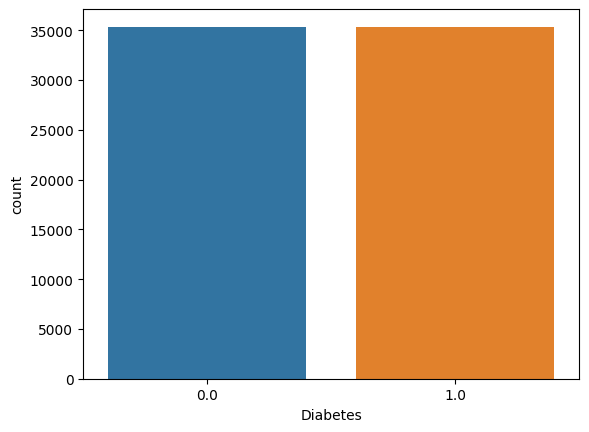

In [7]:
# visualize the results

sns.countplot(data=data,x='Diabetes')
plt.show()

In [8]:
# define the predictor X and the target y

X = data.drop(['Diabetes'], axis=1)
y = data["Diabetes"]

In [9]:
from sklearn.model_selection import train_test_split

# train and test data split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0,test_size=0.2)

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit_transform(X_train)
#scaler.fit(X_test)
#scaler.fit(X_val)

In [15]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

In [16]:
# the shape of train and test sets

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42414, 17)
(42414,)
(14139, 17)
(14139,)


In [17]:
X_train

array([[0.66666667, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.83333333, 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.58333333, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.91666667, 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

## 1. Random Forest Classifier

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# determine the best value of the RF hyperparameter
clf = GridSearchCV(RandomForestClassifier(), {
    'n_estimators': [10,20,30]
}, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30]})

In [19]:
rfCV = pd.DataFrame(clf.cv_results_)

In [20]:
rfCV[['param_n_estimators','params','mean_test_score']]

,param_n_estimators,params,mean_test_score
0,10,{'n_estimators': 10},0.706323
1,20,{'n_estimators': 20},0.717452
2,30,{'n_estimators': 30},0.721672


In [21]:
print("The best fit parameter will be "+str(clf.best_params_)+ " with score "+str(clf.best_score_))

The best fit parameter will be {'n_estimators': 30} with score 0.7216720359731349


In [22]:
from sklearn.ensemble import RandomForestClassifier
# build the Random Forest classifier
rfc = RandomForestClassifier(n_estimators= 30)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [23]:
# make a prediction

y_predict = rfc.predict(X_test)

In [24]:
# comparing between the actual and the preicted values for the first 20 rows with RF classifier

print(y_test[0:19].tolist())
print(y_predict[0:19].tolist())

[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0]


In [25]:
#Print out the expected and predicted
dm = pd.DataFrame()
dm['Expected'] = y_test[0:7]
dm['Predicted'] = y_predict[0:7]
dm

,Expected,Predicted
34746,0.0,1.0
11085,0.0,0.0
51382,1.0,0.0
53894,1.0,1.0
31333,0.0,1.0
38957,1.0,0.0
14460,0.0,0.0


## 2. Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB

# build the Naive Bayes classifier


In [27]:
from sklearn.naive_bayes import GaussianNB

# build the Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [28]:
# make a prediction
y_predict = nb.predict(X_test)

In [29]:
#Print out the expected and predicted value
dm = pd.DataFrame()
dm['Expected'] = y_test[0:7]
dm['Predicted'] = y_predict[0:7]
dm

,Expected,Predicted
34746,0.0,1.0
11085,0.0,0.0
51382,1.0,0.0
53894,1.0,1.0
31333,0.0,1.0
38957,1.0,0.0
14460,0.0,0.0


## 3. Logistic Regression Classifier

In [30]:
# determine the best value of the LR hyperparameter
from sklearn.linear_model import LogisticRegression
clf = GridSearchCV(LogisticRegression(), {
    'C': [1,10,20],
    'penalty': ['l2'],
    'max_iter':[50,100,200]
}, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 10, 20], 'max_iter': [50, 100, 200],
                         'penalty': ['l2']})

In [31]:
lrCV= pd.DataFrame(clf.cv_results_)

In [32]:
lrCV[['param_C','params','mean_test_score']]

,param_C,params,mean_test_score
0,1,"{'C': 1, 'max_iter': 50, 'penalty': 'l2'}",0.747465
1,1,"{'C': 1, 'max_iter': 100, 'penalty': 'l2'}",0.747465
2,1,"{'C': 1, 'max_iter': 200, 'penalty': 'l2'}",0.747465
3,10,"{'C': 10, 'max_iter': 50, 'penalty': 'l2'}",0.747513
4,10,"{'C': 10, 'max_iter': 100, 'penalty': 'l2'}",0.747513
5,10,"{'C': 10, 'max_iter': 200, 'penalty': 'l2'}",0.747513
6,20,"{'C': 20, 'max_iter': 50, 'penalty': 'l2'}",0.747560
7,20,"{'C': 20, 'max_iter': 100, 'penalty': 'l2'}",0.747560
8,20,"{'C': 20, 'max_iter': 200, 'penalty': 'l2'}",0.747560


In [33]:
print("The best fit parameter will be "+str(clf.best_params_)+ " with score "+str(clf.best_score_))

The best fit parameter will be {'C': 20, 'max_iter': 50, 'penalty': 'l2'} with score 0.7475597185188303


In [34]:
from sklearn.linear_model import LogisticRegression

# build the Logistic Regression classifier
lr = LogisticRegression(C= 20,penalty='l2',max_iter=50)
lr.fit(X_train,y_train)

LogisticRegression(C=20, max_iter=50)

In [35]:
# make a prediction
y_predict = lr.predict(X_test)

In [37]:
#Print out the expected and predicted value
dm = pd.DataFrame()
dm['Expected'] = y_test[0:7]
dm['Predicted'] = y_predict[0:7]
dm

,Expected,Predicted
34746,0.0,1.0
11085,0.0,0.0
51382,1.0,0.0
53894,1.0,1.0
31333,0.0,1.0
38957,1.0,0.0
14460,0.0,0.0


## 4. Support Vector Machine Classifier

In [ ]:
# determine the best value of the SVM hyperparameters
# SVC takes longer time to execute compared to othe algorithms

#clf = GridSearchCV(svm.SVC(gamma='auto'), {
#    'C': [1,3,5],
#    'kernel': ['rbf','poly','linear']
#}, cv=5, return_train_score=False)
#clf.fit(X_train ,y_train)

In [ ]:
svmCV = pd.DataFrame(clf.cv_results_)

In [ ]:
svmCV[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.746203
1,1,poly,0.736778
2,1,linear,0.746857
3,3,rbf,0.746645
4,3,poly,0.739536
5,3,linear,0.746786
6,5,rbf,0.746875
7,5,poly,0.740544
8,5,linear,0.746804


In [ ]:
print("The best fit parameter will be "+str(clf.best_params_)+ " with score "+str(clf.best_score_))

The best fit parameter will be {'C': 5, 'kernel': 'rbf'} with score 0.7468746158465961


In [ ]:
from sklearn import svm

# build the Support Vectorlinear Machine classifier
#model = svm.SVC(kernel='linear',C=1, gamma='auto')
#model.fit(X_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [ ]:
# make a prediction

y_predict = model.predict(X_test)

In [ ]:
#Print out the expected and predicted value
dm = pd.DataFrame()
dm['Expected'] = y_test[0:19]
dm['Predicted'] = y_predict[0:19]
dm

,Expected,Predicted
34746,0.0,1.0
11085,0.0,0.0
51382,1.0,0.0
53894,1.0,1.0
31333,0.0,1.0
38957,1.0,0.0
14460,0.0,0.0
54448,1.0,1.0
64178,1.0,1.0
34343,0.0,0.0


# 5- K Neighbors Classifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [3,8,10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']

}, cv=5, return_train_score=False)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'n_neighbors': [3, 8, 10]})

In [40]:
knnCV= pd.DataFrame(clf.cv_results_)

In [42]:
knnCV[['param_n_neighbors','param_algorithm','mean_test_score']]

,param_n_neighbors,param_algorithm,mean_test_score
0,3,auto,0.686542
1,8,auto,0.709530
2,10,auto,0.714080
3,3,ball_tree,0.687014
4,8,ball_tree,0.709365
5,10,ball_tree,0.713797
6,3,kd_tree,0.687179
7,8,kd_tree,0.709718
8,10,kd_tree,0.714127


In [43]:
print("The best fit parameter will be "+str(clf.best_params_)+ " with score "+str(clf.best_score_))

The best fit parameter will be {'algorithm': 'kd_tree', 'n_neighbors': 10} with score 0.7141274156841082


In [45]:
knn_model = KNeighborsClassifier(n_neighbors=10,algorithm='kd_tree')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)

In [47]:
# make a prediction

y_predict = knn_model.predict(X_test)

In [48]:
#Print out the expected and predicted value
dm = pd.DataFrame()
dm['Expected'] = y_test[0:7]
dm['Predicted'] = y_predict[0:7]
dm

,Expected,Predicted
34746,0.0,1.0
11085,0.0,0.0
51382,1.0,0.0
53894,1.0,1.0
31333,0.0,1.0
38957,1.0,0.0
14460,0.0,0.0


### Model Evaluation

In [49]:
# measure the model accuracy, precision, and recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

rf_acc = accuracy_score(y_test, rfc.predict(X_test))
rf_pre = precision_score(y_test, rfc.predict(X_test), average='weighted')
rf_re = recall_score(y_test, rfc.predict(X_test), average='weighted')

nb_acc = accuracy_score(y_test, nb.predict(X_test))
nb_pre = precision_score(y_test, nb.predict(X_test), average='weighted')
nb_re = recall_score(y_test, nb.predict(X_test), average='weighted')

lr_acc = accuracy_score(y_test, lr.predict(X_test))
lr_pre =  precision_score(y_test, lr.predict(X_test), average='weighted')
lr_re = recall_score(y_test, lr.predict(X_test), average='weighted')

knn_model_acc = accuracy_score(y_test, knn_model.predict(X_test))
knn_model_pre = precision_score(y_test, knn_model.predict(X_test), average='weighted')
knn_model_re = recall_score(y_test, knn_model.predict(X_test), average='weighted')

In [50]:
# compare between the train and test scores

rf_train = rfc.score(X_train, y_train)
rf_test = rfc.score(X_test, y_test)

nb_train = nb.score(X_train, y_train)
nb_test = nb.score(X_test, y_test)

lr_train = lr.score(X_train, y_train)
lr_test = lr.score(X_test, y_test)

knn_model_train = knn_model.score(X_train, y_train)
knn_model_test = knn_model.score(X_test, y_test)

In [52]:
metrics_scores = [{'Accuracy score': rf_acc,\
                   'Precision score': rf_pre,\
                   'Recall score': rf_re,\
                   'Train Score': rf_train,\
                   'Test Score': rf_test},\
                  {'Accuracy score': nb_acc,\
                   'Precision score': nb_pre,\
                   'Recall score': nb_re,\
                   'Train Score': nb_train,\
                   'Test Score': nb_test},\
                  {'Accuracy score': lr_acc,\
                   'Precision score': lr_pre,\
                   'Recall score': lr_re,\
                   'Train Score': lr_train,\
                   'Test Score': lr_test},\
                  {'Accuracy score': knn_model_acc,\
                  'Precision score': knn_model_pre,\
                   'Recall score': knn_model_re,\
                   'Train Score': knn_model_train,\
                   'Test Score': knn_model_test}]
#matrics_scores.append()

df_scores = pd.DataFrame(metrics_scores, index = [ 'Random Forest Classifier' ,'Naive Bayes',\
                                                  'Logistic Regression', 'K Neighbor sClassifier'])
df_scores.applymap('{:.2f}'.format)

,Accuracy score,Precision score,Recall score,Train Score,Test Score
Random Forest Classifier,0.73,0.73,0.73,0.98,0.73
Naive Bayes,0.73,0.73,0.73,0.72,0.73
Logistic Regression,0.75,0.75,0.75,0.75,0.75
K Neighbor sClassifier,0.72,0.72,0.72,0.77,0.72


In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn import metrics

Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

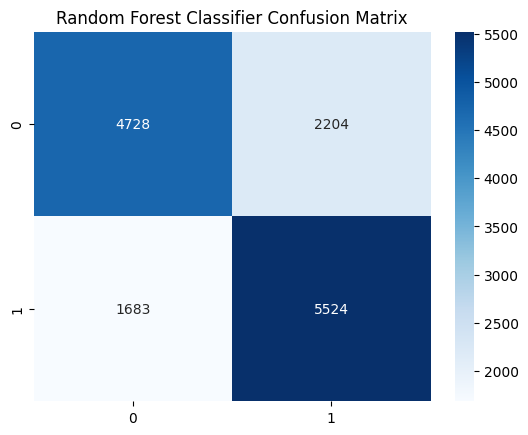

In [55]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=rfc.predict(X_test))
mc_df = pd.DataFrame(confusion_matrix,
                     index=[0,1],
                     columns=[0,1])
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("Random Forest Classifier Confusion Matrix")

Text(0.5, 1.0, 'Naive BayesConfusion Matrix')

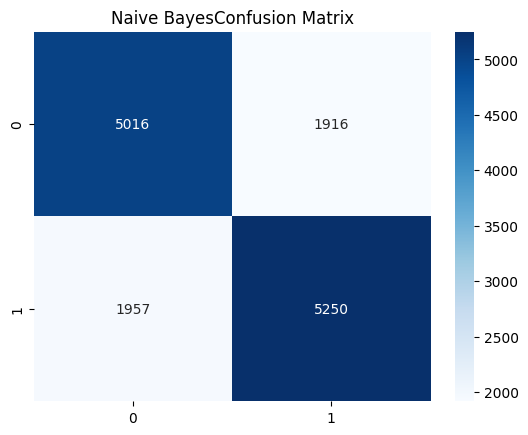

In [56]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=nb.predict(X_test))
mc_df = pd.DataFrame(confusion_matrix,
                     index=[0,1],
                     columns=[0,1])
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("Naive BayesConfusion Matrix")

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

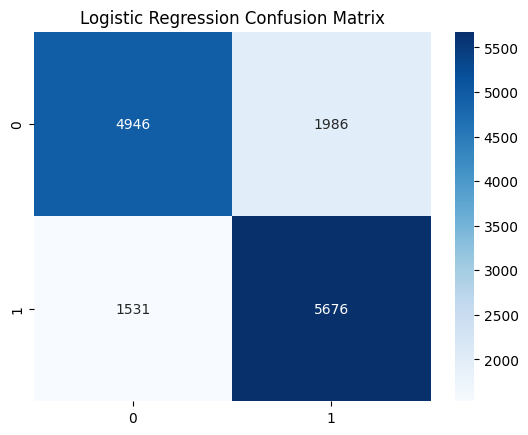

In [57]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=lr.predict(X_test))
mc_df = pd.DataFrame(confusion_matrix,
                     index=[0,1],
                     columns=[0,1])
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("Logistic Regression Confusion Matrix")

Text(0.5, 1.0, 'K Neighbor Classifier\t Confusion Matrix')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


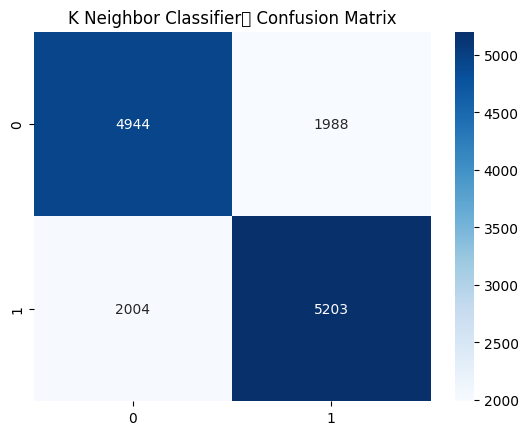

In [58]:
confusion_matrix = metrics.confusion_matrix(y_true=y_test,
                                            y_pred=knn_model.predict(X_test))
mc_df = pd.DataFrame(confusion_matrix,
                     index=[0,1],
                     columns=[0,1])
sns.heatmap(mc_df, annot =True, fmt="d",cmap=plt.get_cmap('Blues'))
plt.title("K Neighbor Classifier	 Confusion Matrix")

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

# mesure the RF performance using multilabel_confusion_matrix

print('Confusion Matrix of the Random Forest classifier:')
rf_cm = multilabel_confusion_matrix(y_test, rfc.predict(X_test), labels=[0, 1, 2])
rf_cm

Confusion Matrix of the Random Forest classifier:


array([[[ 5470,  1737],
        [ 2111,  4821]],

       [[ 4821,  2111],
        [ 1737,  5470]],

       [[14139,     0],
        [    0,     0]]])

In [ ]:
# mesure the NB performance using multilabel_confusion_matrix

print('Confusion Matrix of the Naive Bayes classifier:')
nb_cm = multilabel_confusion_matrix(y_test, nb.predict(X_test), labels=[0, 1, 2])
nb_cm

Confusion Matrix of the Naive Bayes classifier:


array([[[ 5199,  2008],
        [ 1888,  5044]],

       [[ 5044,  1888],
        [ 2008,  5199]],

       [[14139,     0],
        [    0,     0]]])

In [ ]:
# mesure the LR performance using multilabel_confusion_matrix

print('Confusion Matrix of the Logistic Regression classifier:')
lr_cm = multilabel_confusion_matrix(y_test, lr.predict(X_test), labels=[0, 1, 2])
lr_cm

Confusion Matrix of the Logistic Regression classifier:


array([[[ 5575,  1632],
        [ 1964,  4968]],

       [[ 4968,  1964],
        [ 1632,  5575]],

       [[14139,     0],
        [    0,     0]]])

In [ ]:
# mesure the SVM performance using multilabel_confusion_matrix

print('Confusion Matrix of the Support Vector Machine classifier:')
svm_cm = multilabel_confusion_matrix(y_test, model.predict(X_test), labels=[0, 1, 2])
svm_cm

Confusion Matrix of the Support Vector Machine classifier:


C:\Users\altul\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:579: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask &= (ar1 != a)


array([[[180,   0],
        [  0,   0]],

       [[180,   0],
        [  0,   0]],

       [[180,   0],
        [  0,   0]]], dtype=int64)

In [ ]:
# plot the multilabel_confusion_matrix
# Random Forest

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rfc, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Greens)
plt.show()

         # Random Forest                              # Naive Bayes

ImportError: ignored

In [ ]:
# Naive Bayes

plot_confusion_matrix(nb, X_test, y_test, display_labels=[0, 1 ], cmap=plt.cm.Blues)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
# Logistic Regression

plot_confusion_matrix(lr, X_test, y_test, display_labels=[0, 1,], cmap=plt.cm.Purples)
plt.show()

         # Logistic Regression                          # SVM

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
# Support Vector Machine

plot_confusion_matrix(model, X_test, y_test, display_labels=[0, 1], cmap=plt.cm.Reds)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined